In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ml_utils.save_io as io
import numpy as np
import os
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [2]:
df = pd.read_csv("../training_scripts/2d_games/objPreVsPost/systematicity_manifest.csv", sep="!")
df = df.sort_values(by="model_type")

In [3]:
idx = (df['seed']!=121330)
# idx = idx&(df['post_obj_preds']==1)
filtered_df = df.loc[idx]

In [4]:
filtered_df['Model Type'] = filtered_df['model_type']
filtered_df['Object Predictions'] = filtered_df.apply(lambda x: "Post Motion" if x.post_obj_preds else "Pre Motion", axis=1)
filtered_df['seed'] = filtered_df['seed'].astype("category")

/home/grantsrb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/grantsrb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/grantsrb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [5]:
x = "seed"
y = "gen_obj_acc"
hue = "Model Type"
style = "Object Predictions"

(array([0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 ]),
 <a list of 10 Text yticklabel objects>)

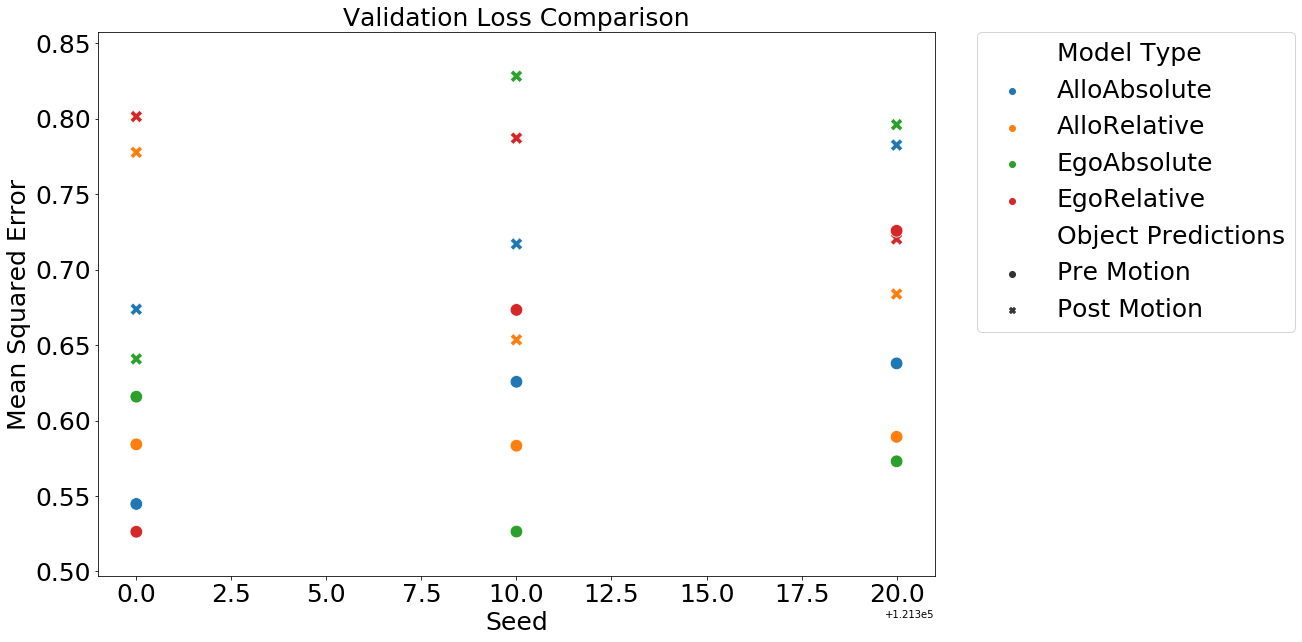

In [6]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x="seed", y=y, hue=hue, style=style, data=filtered_df, s=160)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=25)
plt.title("Validation Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=25)
plt.xlabel("Seed", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

In [7]:
x = style
y = "gen_loc_loss"
hue = "Model Type"

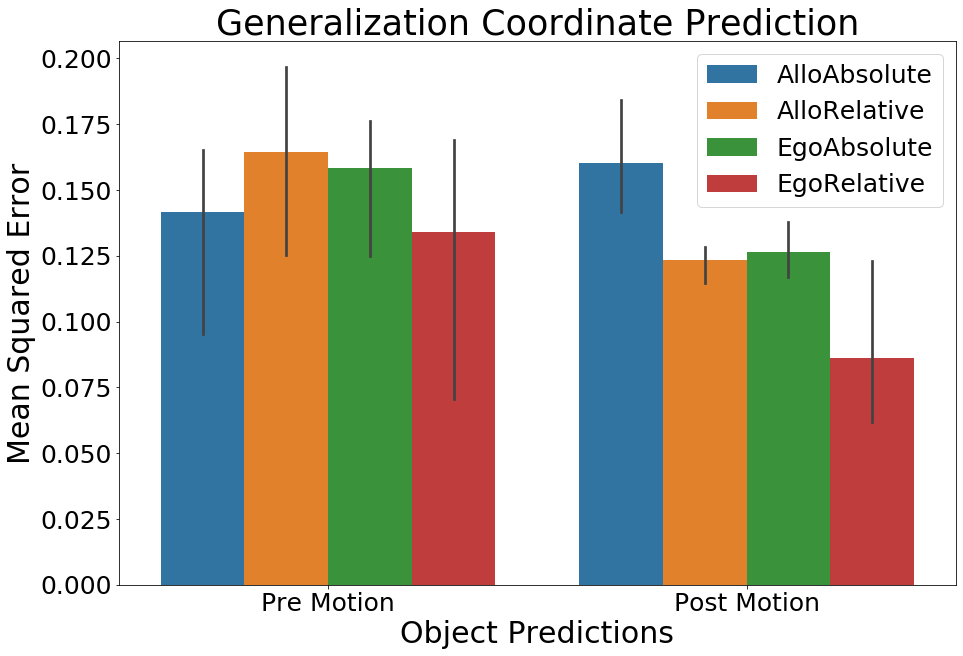

In [8]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=x, y=y, hue=hue, data=filtered_df,hue_order=)
# plt.ylim([0,.75])
# plt.xlim([-1,125])
plt.title("Generalization Coordinate Prediction",fontsize=35)
plt.ylabel("Mean Squared Error",fontsize=30)
plt.xlabel(x,fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=25)

## Facet the Accuracies

In [9]:
filtered_df['facet'] = filtered_df.apply(lambda x: "Post Motion "+x.model_type if x.post_obj_preds else "Pre Motion "+x.model_type, axis=1)

/home/grantsrb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
filt_df = filtered_df
filt_df = pd.melt(filt_df, ["facet"], ["gen_obj_acc", "gen_color_acc", "gen_shape_acc"], "Accuracy Type", "Accuracy")

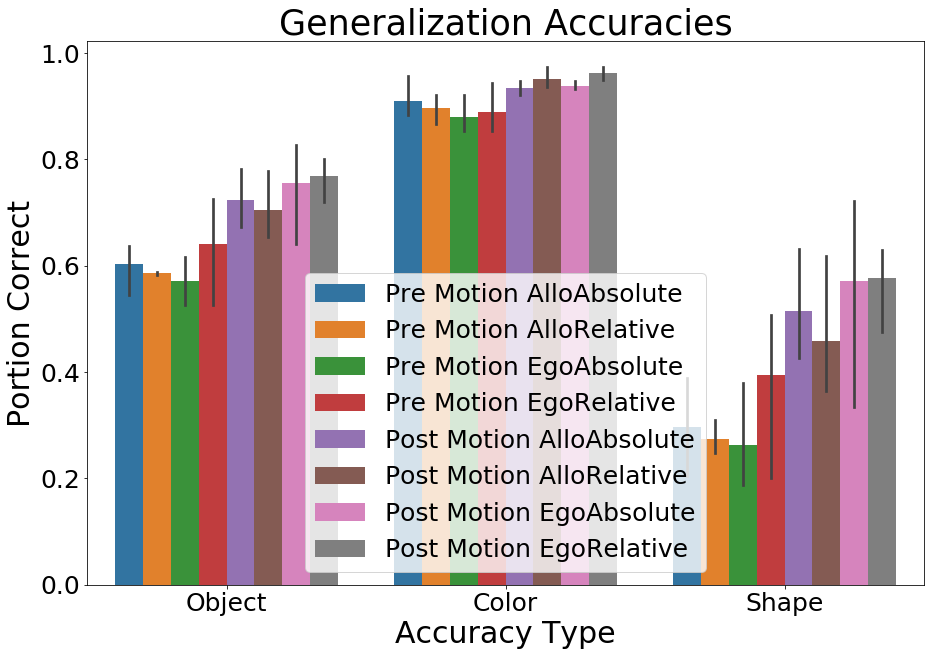

In [12]:
fig = plt.figure(figsize=(15,10))
order = ["Pre Motion AlloAbsolute","Pre Motion AlloRelative", "Pre Motion EgoAbsolute", "Pre Motion EgoRelative", 
         "Post Motion AlloAbsolute", "Post Motion AlloRelative","Post Motion EgoAbsolute","Post Motion EgoRelative"]
# order = None
sns.barplot(x="Accuracy Type", y="Accuracy", hue="facet", hue_order=order, data=filt_df)
# plt.ylim([0,.75])
# plt.xlim([-1,125])
plt.title("Generalization Accuracies",fontsize=35)
plt.ylabel("Portion Correct",fontsize=30)
plt.xlabel("Accuracy Type", fontsize=30)
ax = plt.gca()
ax.set_xticklabels(["Object", "Color", "Shape"])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)

## Compare by seed

In [43]:
seed_avgs_df = filtered_df.groupby(["seed"])[y].mean().reset_index()
seed_avgs_df['seed_avg'] = seed_avgs_df[y]
del seed_avgs_df[y]
seed_df = filtered_df.merge(seed_avgs_df,how="left",on=["seed"])
seed_df['seed_deviation'] = seed_df[y]-seed_df['seed_avg']

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 7 Text yticklabel objects>)

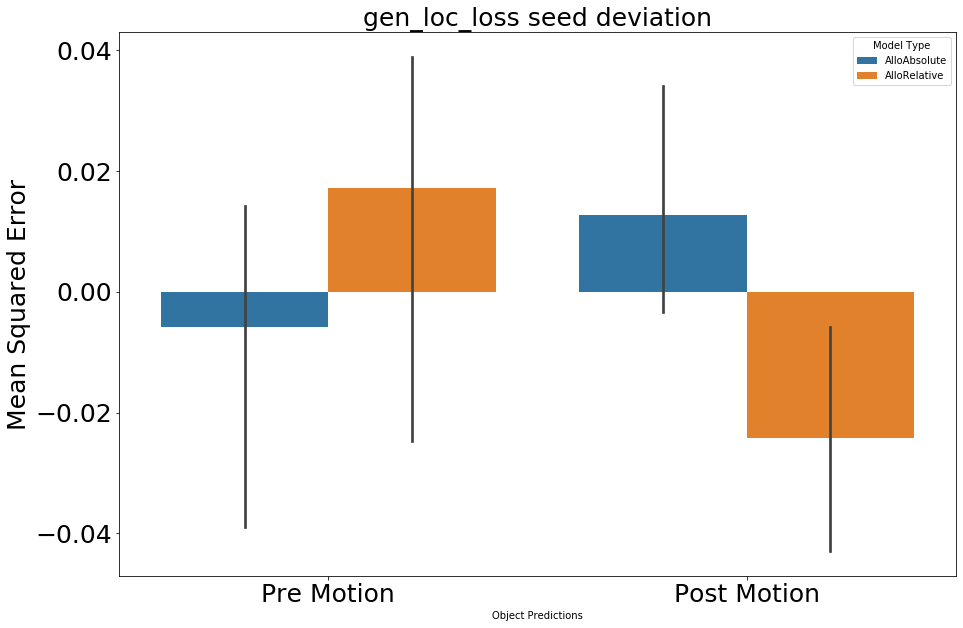

In [44]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=x, y='seed_deviation', hue=hue, data=seed_df)
# plt.ylim([0,.75])
# plt.xlim([-1,125])
plt.title(y + " seed deviation",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=25)
# plt.xlabel("Epoch", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)